### 4.4 
#### Use the World Bank life expectancy data and a linear model by R to predict the life expectancy in the United States for year 2040.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import os
warnings.filterwarnings("ignore") 

In [2]:
#read in data
os.chdir("/Users/vinceverdugo/Downloads/mathmodeling")
usData = \
    pd.read_csv("API_SP.DYN.LE00.IN_DS2_en_csv_v2_107.csv",
                                   header=2, index_col=0)
#create array using data
usDataArray = np.array(usData.loc['United States', '1960':'2021'])
#create array of years for graphing and linear modeling
years = np.arange(1960,2022)

In [3]:
#Use linear model definition from book
def linear_model(x):
    return lambda t: x[0]*t + x[1]

trend = np.polyfit(years, usDataArray.astype(float), 1)
expectancy = linear_model(trend)

In [4]:
#Linear model is defined using calendar year as 'x' value
#This explains the relatively "small" slope
print(f"Linear Model of United States Life Expectancy: Life expectancy = {trend[0]:.3f}(year) + {trend[1]:.3f}\n")

Linear Model of United States Life Expectancy: Life expectancy = 0.159(year) + -242.025



In [5]:
#.astype(int) will round down value, which is what we want
print(f"Life expectancy in United States for year 2040: {expectancy(2040).astype(int)}")

Life expectancy in United States for year 2040: 82


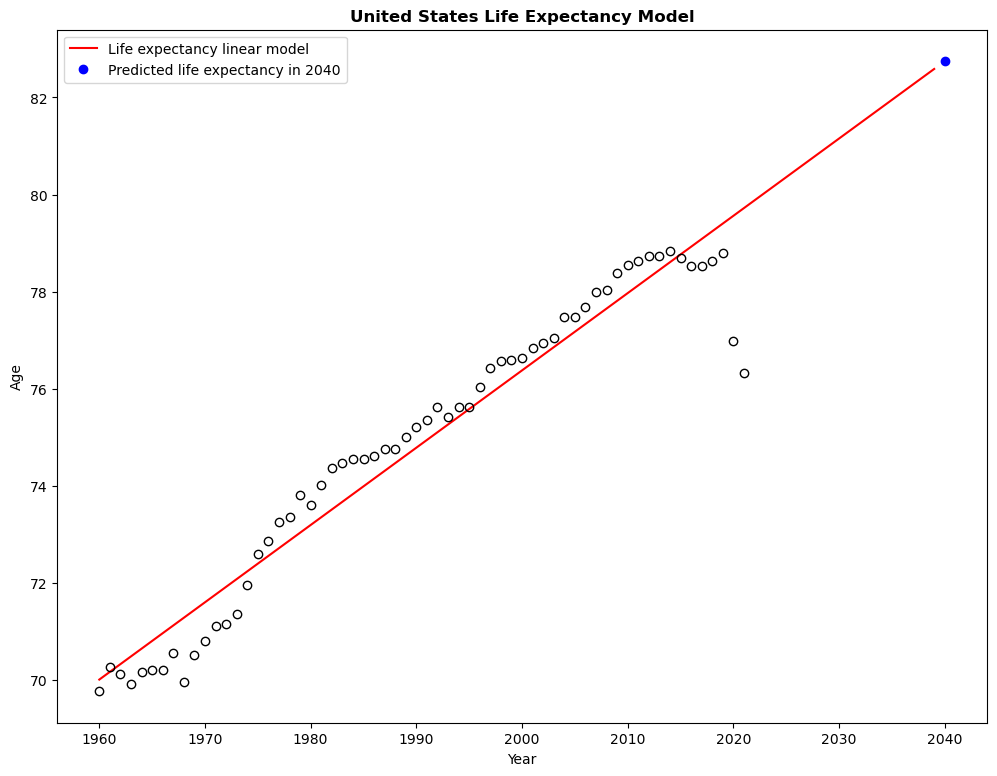

In [6]:
#Make second years array to plot from 1960-2040
yearsGraph = np.arange(1960,2040)
plt.figure(figsize=(12,9))
plt.plot(yearsGraph, expectancy(yearsGraph), '-r',
        label = "Life expectancy linear model")
plt.plot(2040, expectancy(2040), 'bo', label = "Predicted life expectancy in 2040")
plt.plot(years, usDataArray, 'ko', mfc = 'none')
plt.title("United States Life Expectancy Model",fontweight="bold")
plt.xlabel("Year")
plt.ylabel("Age")
plt.legend(loc = 'best')

### 5.6
#### You would like to put away some money every month for your retirement when you reach 30 years old. You plan to retire at age of 68 and live up to 118 years old. You would like to be able to draw $1,000 per month, called annuity payment, from the saving from the first month of your 69th year, i.e., the first month after your 68th birthday. The money is all used up when you reach your 118th birthday. If the annuity interest rate is 5% per year, how much you need to start paying to your annuity fund when you reach 30 until your retirement? You can use a method similar to the mortgage calculation.

In [7]:
#time saving: 38*12 (months)
tSav = 38*12
#time retired: 50*12 (months)
tRet = 50*12
#annuity payement = $1,000 per month
p = 1000
#fund balance when retired: payment * (months retired)
fund = p*tRet
#annuity interest rate (in months)
r = 0.05/12

payment = (fund)*r/(1-(1+r)**-tSav)
print(f"Monthly payment needed to save $600,000 in annuity fund from age 30-68: ${payment:.2f}")

Monthly payment needed to save $600,000 in annuity fund from age 30-68: $2941.73


### 5.7
#### Use the EBM and R to estimate the lunar surface temperature at lunar latitude 30◦ North and at 3:00 PM, lunar local time. Hint: The 12:00 PM noon for a lunar location is when the location directly faces the Sun. From this point, the location of 3:00 PM can be found.

In [8]:
#Using EBM model from Stawsky code
from scipy import optimize as opt
def ebm_maker(a, s, la, lo, e, si, ka, t0, he):
    return lambda t: (1-a)*s*np.cos(la)*np.cos(lo) - e*si*(t**4) - ka*(t - t0)/he

In [9]:
#EBM model is defined to set noon at lon = 0*pi/180
#Assuming 15 degrees longitude = 1 hour, 45deg = 3pm
lat = (30)*(np.pi/180)
lon = (45)*(np.pi/180)

#Parameters for surface of moon
sigma = 5.670367e-8
alpha = 0.12
S = 1368
ep = 0.98
k = 7.4e-4
h = 0.4
T0 = 260

#Call EBM maker to create function for current lat, lon values
EBMval = ebm_maker(alpha, S, lat, lon, ep, sigma, k, T0, h)

#For surface temperature, we will need to find the root
#By using opt.root function, this will find the root for us
#test['x'][0] will give us that value --> surface temperature
test = opt.root(EBMval, x0=400)
sTemp = test['x'][0]
print(f"Surface temperature at 30N and 3PM lunar local time: {sTemp:.2f} K")

Surface temperature at 30N and 3PM lunar local time: 339.36 K


### 5.8 
#### Use the EBM and R to estimate the lunar surface temperature at 24 points uniformly distributed on the equator. List the results in a table of three columns. The first column is longitude, the second is temperature in Kelvin, and third is temperature in degrees Celsius.

In [10]:
#360/24 = 15
#Create array of 24 points 15 degrees apart
pts = 15*np.arange(-11,13)
#Create empty arrays to store surface temp values
sTempK = []
sTempC = []

In [11]:
#Equator is latitude 0
lati = (0)*(np.pi/180)

#Loop will iterate all 24 points, calculate EBM, find surface temp, and store surface temp values
for x in pts:
    long = (x)*(np.pi/180)
    EBMmake = ebm_maker(alpha, S, lati, long, ep, sigma, k, T0, h)
    findRoot = opt.root(EBMmake, x0=400)
    sTempL = findRoot['x'][0]
    sTempK.append(sTempL)
    sTempC.append(sTempL - 273.15)

In [12]:
#Formulate data for table
data = {'Longitude (Degrees)': pts, 'Temperature (K)': sTempK, 'Temperature (C)': sTempC}
EBMresults = pd.DataFrame(data, index = np.arange(1,25))
EBMresults

,Longitude (Degrees),Temperature (K),Temperature (C)
1,-165,-19.148839,-292.298839
2,-150,-20.406704,-293.556704
3,-135,-18.472135,-291.622135
4,-120,-18.087089,-291.237089
5,-105,-17.277622,-290.427622
6,-90,51.338614,-221.811386
7,-75,273.635946,0.485946
8,-60,322.592669,49.442669
9,-45,351.789175,78.639175
10,-30,370.078904,96.928904


### 6.1 

#### a) Find all the currents I1, I2, I3, I4, I5. [Hint: Use Kirchhoff’s law to set up five linear equations with I1, I2, I3, I4, I5 as unknowns. Use R program to solve these equations for I1, I2, I3, I4, I5.]

In [13]:
#Solve for I1,I2,I3,I4,I5 using Ax = b notation
A = np.array([1,-1,-1,0,0, 0,0,1,-1,1, 9,-6,0,0,0, 9,0,3,-4,0, 9,0,3,0,-6]).reshape(5,5)
b = np.array([0,0,12,12,12])
x = np.linalg.solve(A,b)
print(A)
print(b)
print(x)

[[ 1 -1 -1  0  0]
 [ 0  0  1 -1  1]
 [ 9 -6  0  0  0]
 [ 9  0  3 -4  0]
 [ 9  0  3  0 -6]]
[ 0  0 12 12 12]
[2.22222222 1.33333333 0.88888889 2.66666667 1.77777778]


#### b) Find the voltage difference between two sides of a resistor using Ohm’s law V = IR. Pay attention to the units: 1 amp × 1 ohm = 1 volt.

In [14]:
Va = -x[1]*6
Vb = -x[3]*4
Vc = x[4]*3
print(Va, "V", Vb, "V", Vc, "V")

-7.999999999999998 V -10.666666666666664 V 5.333333333333332 V


#### c) Find the power consumed by each resistor using the power P = I$^2$R or P = IV. Again, pay attention to units: (1 amp)$^2$ × 1 ohm = 1 watt = 1 amp × 1volt. One can use a light bulb’s heat and light to get an idea of the power of 40 watt.

In [15]:
#6 resistors
P1 = 9*x[0]**2
P2 = 3*x[2]**2
P3 = 9*x[4]**2
P4 = 3*x[4]**2
P5 = 4*x[3]**2
P6 = 6*x[1]**2
print(P1,P2,P3,P4,P5,P6)

44.44444444444445 2.3703703703703702 28.44444444444443 9.481481481481476 28.444444444444432 10.666666666666663


#### d) What is the total power load of this circuit? How much work is done by the battery in this circuit in 10 minutes?

In [16]:
#Total power
P = P1+P2+P3+P4+P5+P6

#Work = Power*time
#T = 600 seconds
W = P*600
#1 joule = 0.0000002778 kWh
#Work in kWh
W_kWh = W*0.0000002778
print(f"In 10 minutes, this battery produces {W_kWh:.4f} killowatts per hour")

In 10 minutes, this battery produces 0.0206 killowatts per hour


### 6.2 
#### The burning of gasoline (C8H18) with oxygen (O2) produces water (H2O) and carbon dioxide (CO2). Balance the chemical reaction equation.
$$C_8H_{18} + O_2 \to H_2O + CO_2$$

Introduce $x_1, x_2, x_3, x_4$ st. $$x_1C_8H_{18} + x_2O_2 \to x_3H_2O + x_4CO_2$$

$C$: $$8x_1 = x_4$$
$H$: $$18x_1 = 2x_3$$
$O$: $$2x_2 = x_3 + 2x_4$$

In [17]:
from sympy import linsolve, symbols
x1, x2, x3, x4 = symbols('x1, x2, x3, x4')
solve = linsolve([8*x1-x4, 18*x1-2*x3, 2*x2-x3-2*x4], (x1, x2, x3, x4))
solve

{(x4/8, 25*x4/16, 9*x4/8, x4)}

Since we want integer solutions, we will set $x_4 = 16t, $$\forall$$ t \in \mathbb{N}$

So for t = 1,
$$2C_8H_{18} + 25O_2 \to 18H_2O + 16CO_2$$

### 6.4 
#### Leontif production model for the 1947 American economy: The economy is assembled into three sectors as an approximation: agriculture, manufacturing, and household. The input-output table is Table 6.4. The bill of demands is: agriculture 2.88 billion, manufacturing 31.45 billion, and household 30.91 billion.

In [18]:
#A = Table 6.4
A = np.array([.245, .102, .051, .099, .291, .279, .433, .372, .011]).reshape(3,3)
#Identity 3x3 matrix 
I = np.identity(3)
d = np.array([2.88, 31.45, 30.91])

#### (a) Use Leontif’s production model to calculate the optimal production level for each sector.

In [19]:
B = I-A
opProd = np.linalg.solve(B, d)
print("Optimal production for each sector:")
print(f"Agriculture: ${opProd[0]:.2f} billion")
print(f"Manufacturing: ${opProd[1]:.2f} billion")
print(f"Household: ${opProd[2]:.2f} billion")

Optimal production for each sector:
Agriculture: $18.21 billion
Manufacturing: $73.17 billion
Household: $66.75 billion


#### (b) Explain the meaning of your results.

Our results then tell us that with the current input and output levels, in order to meet our demands of 2.88 billion for agriculture, 31.45 billion for manufacturing, and 30.91 billion for household, our production levels must be 18.21 billion, 73.17 billion, and 66.75 billion respectively. Although the demands of manufacturing and household are only about 500 million apart, their optimal production are almost 7 billion apart. This is due to the differences in consumption between the two. Manufacturing consumes much more of what it produces compared to household.  

#### (c) Google historical news and governmental documents and justify your results in (a) and (b).

In 1947, manufacturing was the largest sector. In terms of GDP, by looking at https://apps.bea.gov/scb/pdf/2005/12December/1205_GDP-NAICS.pdf, we can see that manufacturing held the highest percentage of GDP. This is concurrent with our results

### 6.8 
#### Make an SVD space-time data decomposition for the 5◦×5◦ latitude-longitude gridded annual (July-June) mean sea surface temperature field anomalies from 1951-2000 over the tropical Pacific: (20◦S −20◦N, 160◦E −100◦W).

In [20]:
stData = \
    pd.read_csv("data/NOAAGlobalT.csv", index_col=0)

In [21]:
stData

,LAT,LON,1880-1,1880-2,1880-3,1880-4,1880-5,1880-6,1880-7,1880-8,...,2016-4,2016-5,2016-6,2016-7,2016-8,2016-9,2016-10,2016-11,2016-12,2017-1
1,-87.5,2.5,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,...,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9
2,-87.5,7.5,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,...,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9
3,-87.5,12.5,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,...,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9
4,-87.5,17.5,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,...,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9
5,-87.5,22.5,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,...,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2588,87.5,337.5,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,...,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9
2589,87.5,342.5,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,...,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9
2590,87.5,347.5,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,...,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9
2591,87.5,352.5,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,...,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9,-999.9


In [122]:
#In NOAAGlobalT.csv this is the row where we want to start extracting data
#22.5x162.5 = row 1616
latMax = 1616
#The lower bound row -1 , will use this in loop
latMin = 967

#Create array
seaTempA = np.array([])

In [129]:
#While loop to add space and time data to seaTemp matrix
#Will create 10 'rows' for each latitude 
while latMax > latMin:
    stRow = np.array(stData.iloc[latMax:latMax+21,854:1454])
    seaTempA = np.append(seaTempA, stRow)
    latMax -= 72

In [130]:
seaTempA.shape

(126000,)

In [131]:
seaTempM = seaTempA.reshape(210, 600)

#### (a) Perform the SVD analysis for the data. Print out the first 10 eigenvalues.

$$A_{s  \times t} = U_{s \times m}D_{m \times m}(V')_{m \times t}$$

In [132]:
U, D, V = np.linalg.svd(seaTempMt, full_matrices=False)
print(U.shape)
print(D.shape)
print(V.shape)

(210, 210)
(210,)
(210, 600)


In [138]:
#Print first 10 eigen values
print("First 10 eigenvaules: \n", U[0:10, 1])

First 10 eigenvaules: 
 [ 7.46523335e-05  3.20702768e-05  7.90727817e-06 -1.52879944e-05
 -2.24758672e-05 -2.47380505e-05  1.92952614e-06  2.41868996e-05
  2.77344830e-05  4.95434261e-05]


#### (b) Plot the map of the first three U column vectors, which are the spatial patterns of the data field, and are also known as Empirical Orthogonal Functions (EOFs).

In [187]:
umat = U[:,4].reshape(21, 10, order='F')
clev = np.linspace(umat.min(), umat.max(), 25)
x = np.arange(10) + 1
y = np.arange(21) + 1

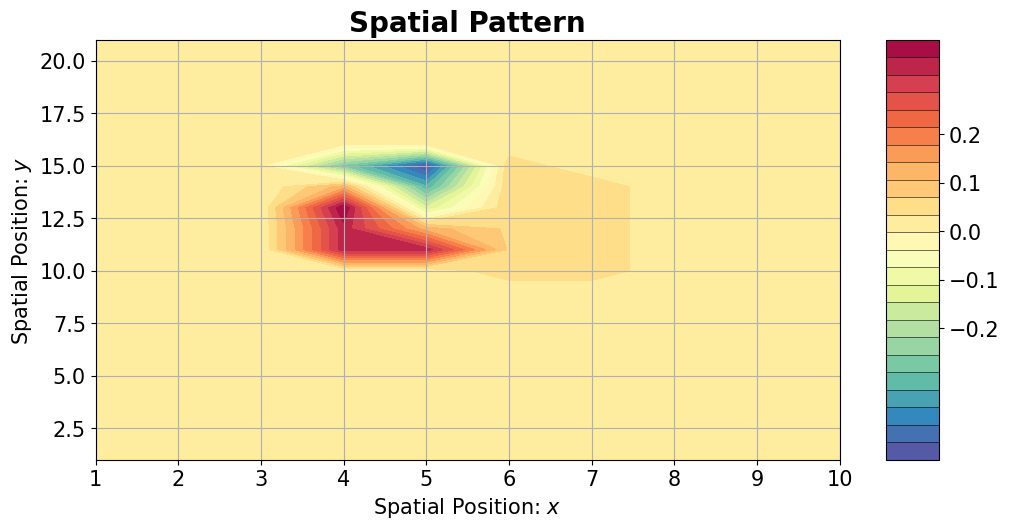

In [188]:
plt.figure(figsize=(12,12))
ax1 = plt.subplot2grid((2,1), (0,0))
ax1.set_xlabel("Spatial Position: $x$", size = 15)
ax1.set_ylabel("Spatial Position: $y$", size = 15)
ax1.set_title("Spatial Pattern", size=20,fontweight="bold")
ax1.tick_params(labelsize=15)
ax1.grid()
contf = ax1.contourf(x, y, umat, clev, cmap=plt.cm.get_cmap('Spectral').reversed())
colbar = plt.colorbar(contf, drawedges=True, aspect=8)
colbar.set_ticks([-.2,-.1,0,.1,.2])
colbar.ax.tick_params(labelsize=15)

#### (c) Plot the time series of the first three V column vectors, which are the temporal patterns of the data field, and are also known as Principal Components (PCs).

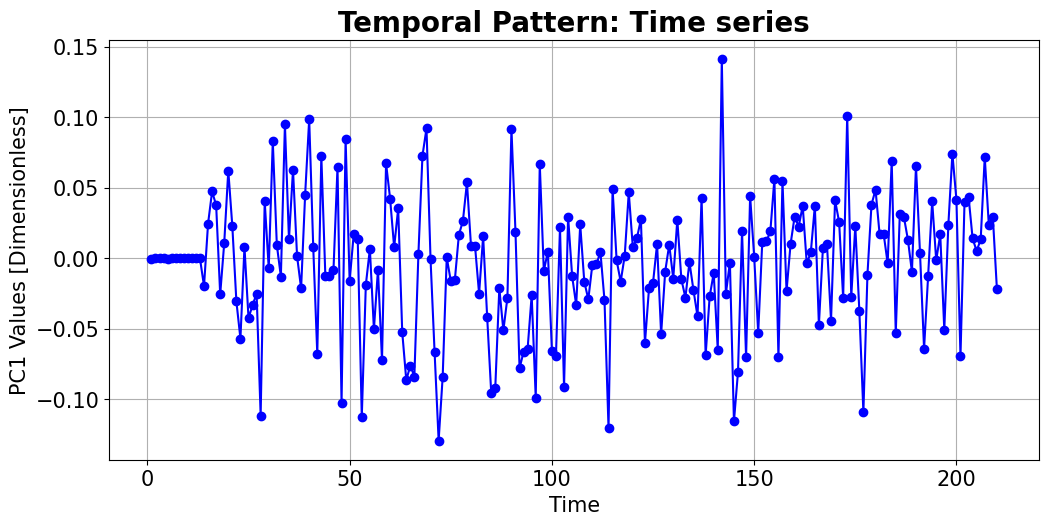

In [179]:
plt.figure(figsize=(12,12))
ax2 = plt.subplot2grid((2,1), (1,0))
ax2.plot(np.arange(V.shape[0]) + 1, V[:,3], 'bo-')
ax2.set_xlabel("Time", size = 15)
ax2.set_ylabel("PC1 Values", size = 15)
ax2.tick_params(labelsize=15)
ax2.set_title("Temporal Pattern", size=20,fontweight="bold")
ax2.grid()